# Week4 - Lab

Take a look at this toy dataset. Perform the following operations
* Train-test split
* Train a linear regression model
* Evaluate/create residual plots
* Explain findings

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv')

In [49]:
data1.head(2)

,Unnamed: 0,X,y
0,0,50,147
1,1,82,246


In [50]:
data2.head(2)

,Unnamed: 0,X1,X2,y
0,0,50,B,2510
1,1,82,B,6738


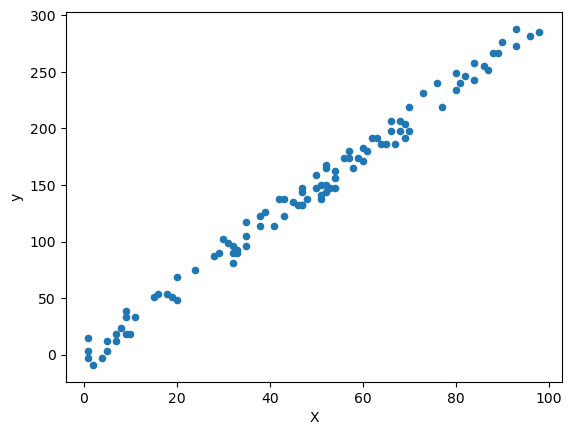

In [51]:
data1.plot.scatter(x='X', y='y')
plt.show()

# FOR DATA 1

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=data1['X']
y=data1['y']
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 80
Test samples: 20


In [53]:
X_training.info()

<class 'pandas.core.series.Series'>
Int64Index: 80 entries, 29 to 1
Series name: X
Non-Null Count  Dtype
--------------  -----
80 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [54]:
X_training= X_training.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [55]:
model=LinearRegression()
model.fit(X_training, y_training)

LinearRegression()

In [56]:
predictions = model.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

98.87733708780208

In [58]:
rmse = np.sqrt(mse)
rmse

9.943708417275824

In [59]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
r2

0.9788414398206349

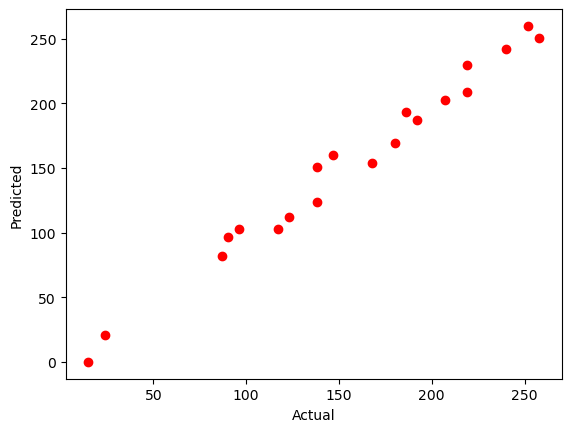

In [60]:
import matplotlib.pyplot as plt

plt.plot(y_test, predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

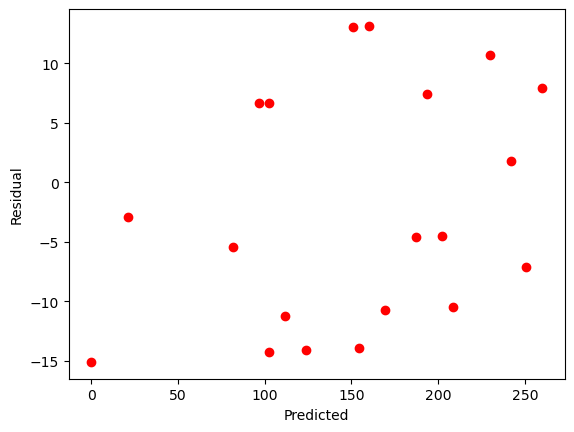

In [61]:
plt.plot(predictions, predictions - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()
#WE FOUND THAT THE RESIDUALS IS HIGH

# FOR DATA 2

In [62]:
from sklearn.model_selection import train_test_split
X=data2[['X1','X2']]
y=data2['y']
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 80
Test samples: 20


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_vars = ['X2']
cat_pipeline = Pipeline([('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('create_dummies', cat_pipeline, cat_vars)])

print(processing_pipeline)

ColumnTransformer(transformers=[('create_dummies',
                                 Pipeline(steps=[('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['X2'])])


In [64]:
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])
modeling_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('create_dummies',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])

In [65]:
predictions = modeling_pipeline.predict(X_test)

In [66]:
mse = mean_squared_error(y_test,predictions)
mse

8588026.371797357

In [67]:
rmse = np.sqrt(mse)
rmse

2930.5334619821965

In [68]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
r2

-0.06872185792662089

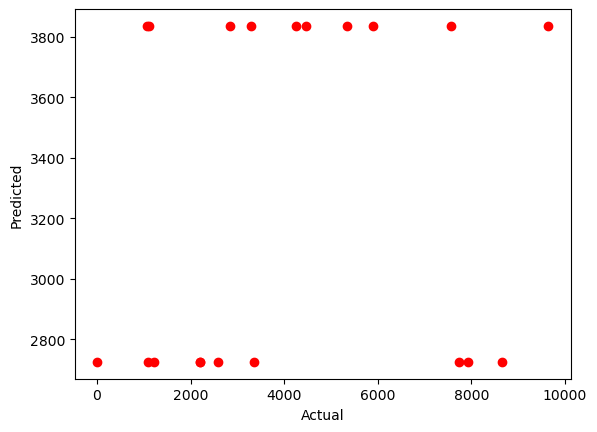

In [69]:
import matplotlib.pyplot as plt

plt.plot(y_test, predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

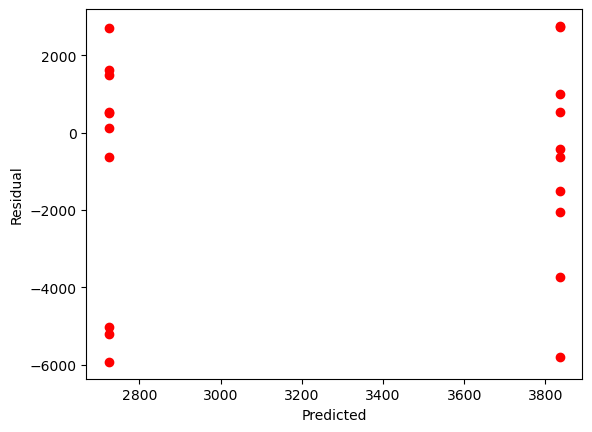

In [70]:
plt.plot(predictions, predictions - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()
#WE CAN OBSERVE THAT THE RESIDAUL IS ONLY AT THE STARTING AND ENDING VALUES